In [1]:
import os

%load_ext autoreload
%autoreload 2

""""
Devo code for moment by moment decoding --> i.e., for each time bin, find strength of representation of
each class of a variable (e.g., shape), as opposed to decoding average accuracy across trials.

Here collecting methods and quick analyses
"""

'"\nDevo code for moment by moment decoding --> i.e., for each time bin, find strength of representation of\neach class of a variable (e.g., shape), as opposed to decoding average accuracy across trials.\n\nHere collecting methods and quick analyses\n'

# Load a dataset

To load and plot a dataset of neural activity across population, in a PopAnal class object.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from neuralmonkey.classes.population_mult import load_handsaved_wrapper

DFallpa = load_handsaved_wrapper()


In [4]:
DFallpa

,which_level,event,bregion,twind,pa,pa_x_shape
0,trial,03_samp,M1,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(43, 424, 160)"
1,trial,03_samp,PMv,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(69, 424, 160)"
2,trial,03_samp,PMd,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(37, 424, 160)"
3,trial,03_samp,dlPFC,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(23, 424, 160)"
4,trial,03_samp,vlPFC,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(54, 424, 160)"
5,trial,03_samp,FP,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(35, 424, 160)"
6,trial,03_samp,SMA,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(53, 424, 160)"
7,trial,03_samp,preSMA,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(67, 424, 160)"
8,trial,05_first_raise,M1,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(43, 424, 160)"
9,trial,05_first_raise,PMv,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(69, 424, 160)"


# Preprocessing

### FR Normalization

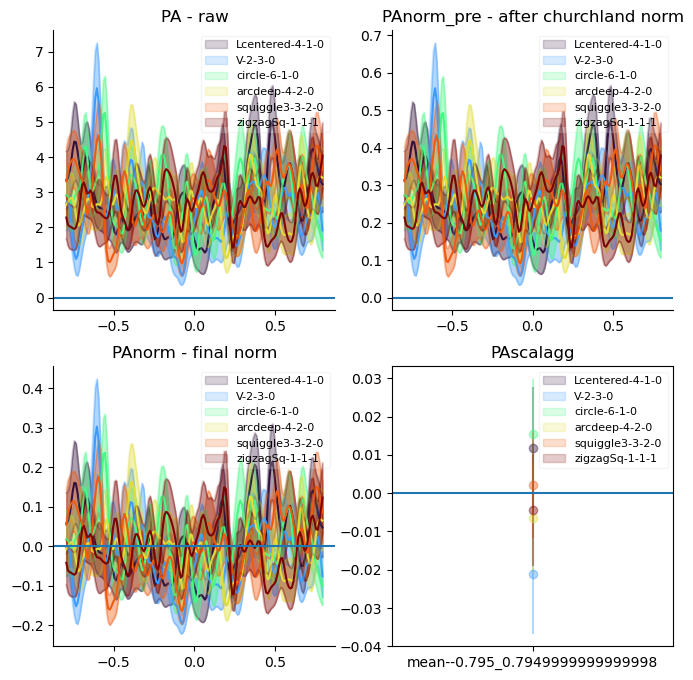

In [5]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_fr_normalization
# fr_normalization_method = "each_time_bin"
fr_normalization_method = "across_time_bins"
plot_savedir = "/tmp"
dfallpa_preprocess_fr_normalization(DFallpa, fr_normalization_method, plot_savedir)

### Factorize all relevant labels FIRST here.


In [ ]:
if False: # Ingore this for now
    from neuralmonkey.analyses.decode_good import preprocess_factorize_class_labels_ints
    MAP_LABELS_TO_INT = preprocess_factorize_class_labels_ints(DFallpa)

### [Optional, for testing] Prune DFallPa to what you want to analyze

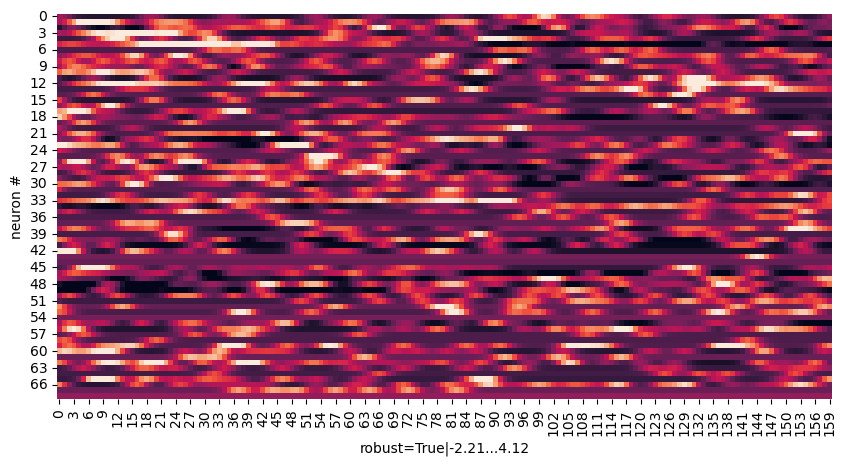

In [6]:
bregions = ["PMv"]
events = ["03_samp"]

DFallpa = DFallpa[(DFallpa["bregion"].isin(bregions)) & (DFallpa["event"].isin(events))].reset_index(drop=True)
pa =DFallpa["pa"].values[0]
pa.plotNeurHeat(trial=100)



In [7]:
# Extract a single PA for testing.

pa = DFallpa["pa"].values[0]
var = "seqc_0_shape"


In [8]:
##### Extract data for pre-samp and post-samp

(424, 69)
424
(848, 69)
848


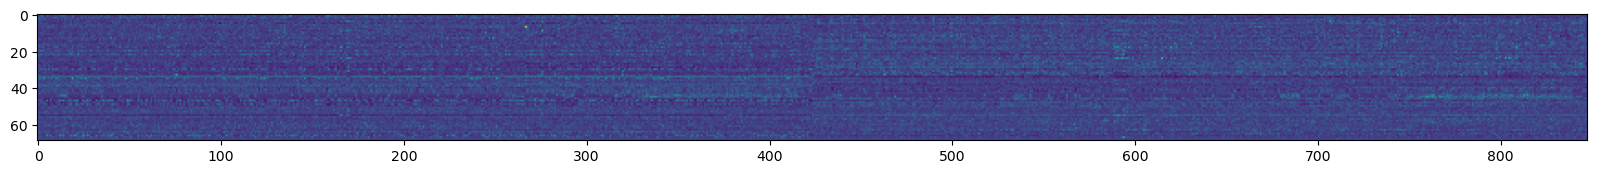

In [9]:
twind = [0.1, 0.7]
pathis = pa.slice_by_dim_values_wrapper("times", twind)
pathis = pathis.agg_wrapper("times")

# Also make test data that is pre-samp
twind = [-0.7, -0.1]
pathis_presamp = pa.slice_by_dim_values_wrapper("times", twind)
pathis_presamp = pathis_presamp.agg_wrapper("times")

X = pathis.X.squeeze().T # (ntrials, nchans)
X_presamp = pathis_presamp.X.squeeze().T
times = pa.Times
dflab = pa.Xlabels["trials"]
labels = dflab[var].tolist()
print(X.shape)
print(len(labels))
# Stack presamp (label="presamp") and postsamp (label="shape X")
# And add a label (pre-samp) by concatenating to post-samp data
import numpy as np
X = np.concatenate([X, X_presamp], axis=0)
_labels = ["presamp" for _ in range(X_presamp.shape[0])]
labels += _labels
# Plot data
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(X.T)

print(X.shape)
print(len(labels))

In [10]:
from neuralmonkey.analyses.decode_good import decode_train_model
from sklearn.linear_model import LogisticRegression
from neuralmonkey.analyses.decode_good import decode_train_model
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC


##### BAD - testing

In [11]:
if False:
    # Train decoders

    mod = decode_train_model(X, labels, do_center=True)

    clf = LogisticRegression().fit(X, labels)


    clf.predict(X[:2, :])

    clf.predict_log_proba(X).shape
    clf.predict_proba(X).shape
    clf.classes_
    np.sum(clf.predict_proba(X), axis=1)

    clf = OneVsRestClassifier(LogisticRegression()).fit(X, labels)



##### GOOD - multi-label classificatin

In [12]:
# (1) Convert labels (shape strings) into one-hot labels
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# convert to list of tuples
labels_tuples = [tuple([x]) for x in labels]

# Return array of one-hots 
labels_mlb = mlb.fit_transform(labels_tuples)

for x, y in zip(labels, labels_mlb):
    print(x, y)

# These are the classes
print("Classes, in order: ", mlb.classes_)

Lcentered-4-1-0 [1 0 0 0 0 0 0]
V-2-3-0 [0 1 0 0 0 0 0]
Lcentered-4-1-0 [1 0 0 0 0 0 0]
V-2-3-0 [0 1 0 0 0 0 0]
circle-6-1-0 [0 0 0 1 0 0 0]
arcdeep-4-2-0 [0 0 1 0 0 0 0]
circle-6-1-0 [0 0 0 1 0 0 0]
squiggle3-3-2-0 [0 0 0 0 0 1 0]
circle-6-1-0 [0 0 0 1 0 0 0]
zigzagSq-1-1-1 [0 0 0 0 0 0 1]
V-2-3-0 [0 1 0 0 0 0 0]
zigzagSq-1-1-1 [0 0 0 0 0 0 1]
arcdeep-4-2-0 [0 0 1 0 0 0 0]
squiggle3-3-2-0 [0 0 0 0 0 1 0]
arcdeep-4-2-0 [0 0 1 0 0 0 0]
zigzagSq-1-1-1 [0 0 0 0 0 0 1]
zigzagSq-1-1-1 [0 0 0 0 0 0 1]
Lcentered-4-1-0 [1 0 0 0 0 0 0]
arcdeep-4-2-0 [0 0 1 0 0 0 0]
V-2-3-0 [0 1 0 0 0 0 0]
squiggle3-3-2-0 [0 0 0 0 0 1 0]
squiggle3-3-2-0 [0 0 0 0 0 1 0]
Lcentered-4-1-0 [1 0 0 0 0 0 0]
circle-6-1-0 [0 0 0 1 0 0 0]
V-2-3-0 [0 1 0 0 0 0 0]
arcdeep-4-2-0 [0 0 1 0 0 0 0]
V-2-3-0 [0 1 0 0 0 0 0]
squiggle3-3-2-0 [0 0 0 0 0 1 0]
squiggle3-3-2-0 [0 0 0 0 0 1 0]
Lcentered-4-1-0 [1 0 0 0 0 0 0]
circle-6-1-0 [0 0 0 1 0 0 0]
circle-6-1-0 [0 0 0 1 0 0 0]
arcdeep-4-2-0 [0 0 1 0 0 0 0]
V-2-3-0 [0 1 0 0 0 0 0]
zi

In [13]:
# (2) Fit classifier

import numpy as np
from sklearn.multiclass import OneVsRestClassifier
# from sklearn.svm import SVC

clf = OneVsRestClassifier(LogisticRegression()).fit(X, labels_mlb)
np.max(clf.predict_proba(X), axis=1)


array([0.97719485, 0.99229327, 0.97107765, 0.99731347, 0.94148234,
       0.9887614 , 0.91284053, 0.38236174, 0.97184821, 0.99881504,
       0.99828751, 0.89945352, 0.9840989 , 0.7144379 , 0.95300066,
       0.77947905, 0.95685031, 0.56857496, 0.96095392, 0.9992948 ,
       0.65189436, 0.94446581, 0.987389  , 0.93225025, 0.99579105,
       0.99912072, 0.99117769, 0.82318708, 0.63159211, 0.9858622 ,
       0.9325161 , 0.99830863, 0.85966744, 0.99423379, 0.9592858 ,
       0.51501814, 0.93965557, 0.93797321, 0.98858913, 0.78348904,
       0.97574745, 0.91400958, 0.99490849, 0.96185961, 0.99931477,
       0.8997526 , 0.95222187, 0.62888529, 0.99257055, 0.91515102,
       0.9969289 , 0.96636012, 0.81705456, 0.96460461, 0.99281597,
       0.28622404, 0.9886152 , 0.89220725, 0.9799587 , 0.99454499,
       0.82967648, 0.98565734, 0.94166957, 0.99177708, 0.84839701,
       0.94756475, 0.94479836, 0.8137936 , 0.9914463 , 0.71941649,
       0.61105478, 0.99103445, 0.42553692, 0.91590941, 0.95269

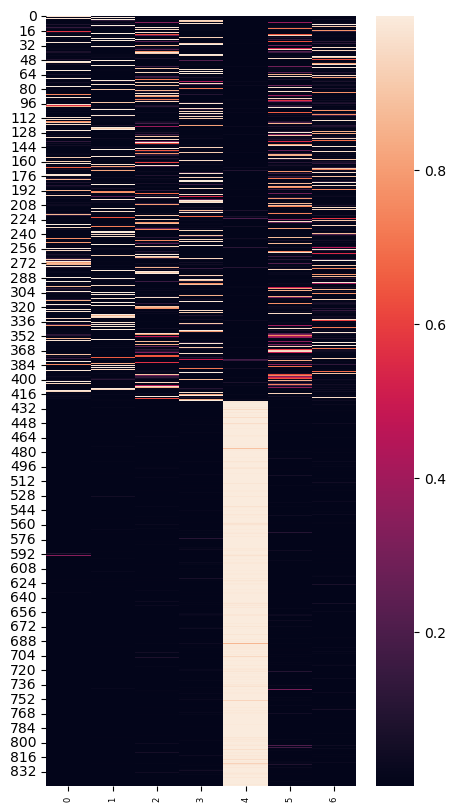

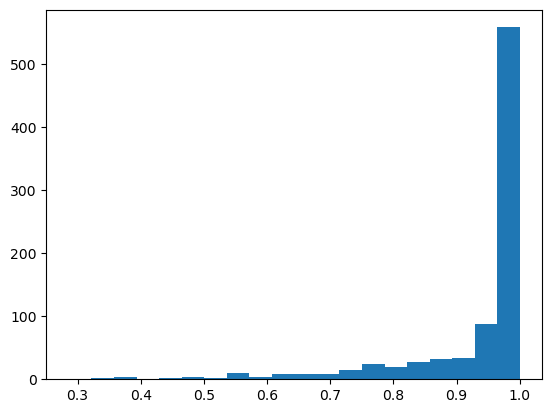

In [14]:
# Plot probabilites
probs = clf.predict_proba(X)
from pythonlib.tools.snstools import heatmap_mat
fig, ax = plt.subplots(figsize=(5, 10))
heatmap_mat(probs, ax = ax, annotate_heatmap=False);

fig, ax = plt.subplots()
probs_max = np.max(probs, axis=1)
ax.hist(probs_max, bins=20);


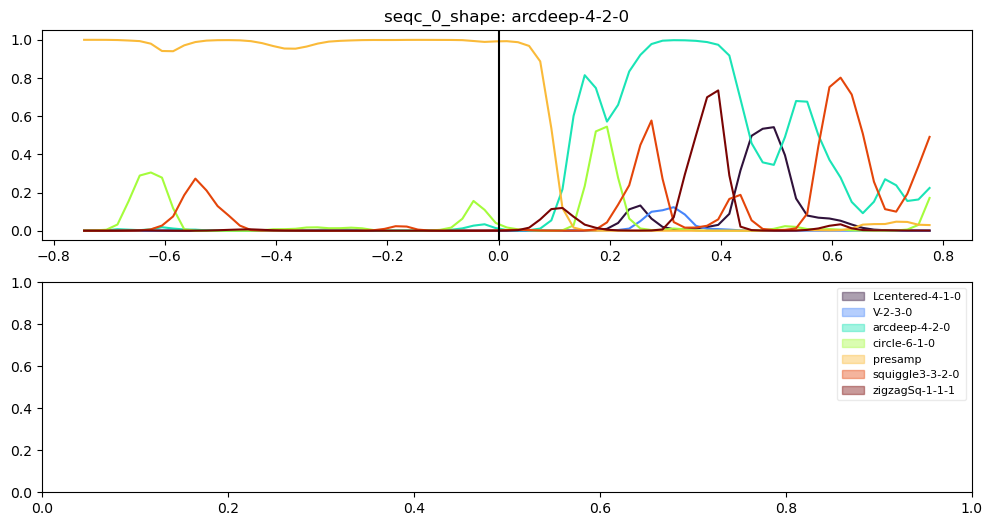

In [15]:
# (3) Plot timecourse of decode for an example trial
trial = 207

dur = 0.1 # Use >=0.1 to avoid high noisiness
slide = 0.02
pathis = pa.agg_by_time_windows_binned(dur, slide)
from pythonlib.tools.plottools import legend_add_manual, makeColors

pcols = makeColors(len(mlb.classes_))

map_lab_to_col = {}
for cl, col in zip(mlb.classes_, pcols):
    map_lab_to_col[cl] = col
if False:
    # Color by novelty
    dflab[dflab["shape_is_novel_all"]==True].index.tolist()
    pcols = makeColors(3)

    map_lab_to_col = {}
    for sh, nov in dflab.loc[:, ["seqc_0_shape", "shape_is_novel_all"]].values:
        if nov:
            pcolthis =  pcols[0]
        else:
            pcolthis = pcols[1]
        
        if sh not in map_lab_to_col:
            map_lab_to_col[sh] = pcolthis
        else:
            assert np.all(map_lab_to_col[sh] == pcolthis)

    map_lab_to_col["presamp"] = pcols[2]
# Plot timecourse of decode


x = pathis.X[:, trial, :].T # (ntimes, nchans)
probs_mat = clf.predict_proba(x) # (ntimes, nlabels)
times = pathis.Times

fig, axes = plt.subplots(2,1, figsize=(12, 6))

ax = axes.flatten()[0]
for i, lab in enumerate(mlb.classes_):
    probs = probs_mat[:, i]
    col = map_lab_to_col[lab]
    ax.plot(times, probs, label=lab, color=col)
ax.axvline(0, color="k")

title = pa.Xlabels["trials"].iloc[trial]["seqc_0_shape"]
ax.set_title(f"seqc_0_shape: {title}")

# ax.legend(loc="best")

ax = axes.flatten()[1]
legend_add_manual(ax, map_lab_to_col.keys(), map_lab_to_col.values())


In [ ]:
# - Extract example data


In [ ]:
# Validate

In [ ]:
# Plot decode timecourse

In [ ]:
# Get a single scalar score

In [ ]:
# Collect scores for each decoder across all trials.


In [ ]:
# Plot confusion matrix.



##### Test how well decoder works for any arbitrary data

# Older methods

### Extract single trial results

In [ ]:

# PARAMS
var_decode = "seqc_0_shape"
bregion = "PMv"
twind = (-0.4, 0.6)

In [ ]:

a = DFRES["var_decode"]==var_decode
b = DFRES["bregion"]==bregion
c = DFRES["twind"]==twind
dfthis = DFRES[a & b & c]

times = dfthis["time"]
import numpy as np
labels_predicted = np.stack(dfthis["labels_predicted"]).T # (ntrials, ntimes)
labels_test = np.stack(dfthis["labels_test"]).T
conf_scores = np.transpose(np.stack(dfthis["conf_scores"]), [1,0,2]) # (ntrials, ntimes, nclasses)

# score each time bin as correct or incorrect
labels_correct = (labels_predicted == labels_test).astype(int)


In [ ]:
# For each trial, what was its label
assert np.all(np.diff(labels_test, axis=1))==0, "otherwise cant do next step."
labels_each_trial = labels_test[:,0]
labels_orig = PA_test.Xlabels["trials"][var_decode].tolist()
assert len(labels_orig)==len(labels_each_trial)

map_labint_to_trials = {}
map_labint_to_laborig = {}
labels_unique = np.unique(labels_each_trial)
for lab in labels_unique:
    inds_this_label = np.argwhere(labels_each_trial == lab).squeeze() # the indices which ahve this label as the CORRECT
    map_labint_to_trials[lab] = inds_this_label

    # Map it back to original label
    lab_orig = PA_test.Xlabels["trials"][var_decode][inds_this_label].unique()
    assert len(lab_orig)==1
    map_labint_to_laborig[lab] = lab_orig[0]

map_trial_to_labint = {i:labint for i, labint in enumerate(labels_each_trial)}
print(map_labint_to_laborig)    
map_laborig_to_labint = {}
for labint, laborig in map_labint_to_laborig.items():
    assert laborig not in map_laborig_to_labint
    map_laborig_to_labint[laborig] = labint

import matplotlib.pyplot as plt
from pythonlib.tools.plottools import makeColors
pcols = makeColors(len(map_labint_to_laborig))
map_trial_to_seq = {}
map_trial_to_seq_ints = {}
for i, seq in enumerate(PA_test.Xlabels["trials"].loc[:, ["seqc_0_shape", "seqc_1_shape"]].values.tolist()):
    map_trial_to_seq[i] = (tuple(seq))
    map_trial_to_seq_ints[i] = [map_laborig_to_labint[s] if s in map_laborig_to_labint else s for s in seq]


In [ ]:
# Pick n random trials
import random
n=  9
trials_all = list(range(len(map_trial_to_labint)))
trials = random.sample(trials_all, n)
ncols = 3
nrows = int(np.ceil(len(trials)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3), sharex=True, sharey=True)

for tr, ax in zip(trials, axes.flatten()):
    
    # ax = axes.flatten()[0]
    lab_pred = labels_predicted[tr,:]
    # lab_corr = labels_correct[trial,:]
    # lab_test = labels_test[trial,:]
    # ax.plot(times, lab_pred, "-ok"),
    # ax.plot(times, lab_test, "-r")
    
    # for each class, plot its time series
    for labint in map_labint_to_laborig:
        cs_this_lab = conf_scores[tr, :, labint].squeeze()
        
        ax.plot(times, cs_this_lab, label=labint, color=pcols[labint])
        # ax.plot(times[lab_pred==labint], cs_this_lab[lab_pred==labint], "-", color=pcols[labint], linewidth=4)
        ax.plot(times[lab_pred==labint], cs_this_lab[lab_pred==labint], "s", color=pcols[labint])
    
    ax.axvline(0, color="k", alpha=0.5)
    ax.set_title(f"{var_decode}={map_trial_to_labint[tr]}", color=pcols[map_trial_to_labint[tr]])
    ax.set_xlabel(f"seq: {map_trial_to_seq_ints[tr]}")
    ax.legend()
        

In [ ]:
# For each class label, collect all trials for which that is the correct label, and overlap

labels_unique = np.unique(labels_each_trial)
ncols = 3
nrows = int(np.ceil(len(labels_unique)/ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4))

for lab, ax in zip(labels_unique, axes.flatten()):
    inds_this_label = np.argwhere(labels_each_trial == lab).squeeze() # the indices which ahve this label as the CORRECT 
    ax.plot(times, labels_predicted[inds_this_label, :].T, "-ok", alpha=0.05)
    ax.set_title(lab)
    
    

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

ax = axes.flatten()[0]
ax.plot(times, labels_correct.T, "xk", alpha=0.003);

In [ ]:
##### Plot the results, comparing score across methods!!
%matplotlib inline
import seaborn as sns
fig = sns.relplot(data=DFRES, x="time", y="score", hue="bregion", col="var_decode",  kind="line")


In [ ]:
##### Plot the results, comparing score across methods!!
%matplotlib inline
import seaborn as sns
fig = sns.relplot(data=DFRES, x="time", y="score", hue="bregion", col="var_decode",  kind="line")


In [ ]:
from neuralmonkey.analyses.decode_good import decodewrapouterloop_categorical_cross_time